# Importação dos dados

In [1]:
# Para manipulaçao dos dados
import pandas as pd

# Metricas para avaliação dos modelos Dummy
import sklearn.metrics

# Para visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url_1 = 'https://github.com/fellypesb/projeto_PET_2021/raw/main/Dados/local_BR/train_local_BR.csv'
url_2 = 'https://github.com/fellypesb/projeto_PET_2021/raw/main/Dados/local_BR/test_local_BR.csv'
local_BR_train = pd.read_csv(url_1)
local_BR_test = pd.read_csv(url_2)

local_BR_train.head()

,month,day,hour,ghi,solar_zenith_angle,clearsky_ghi,relative_humidity,temperature
0,1,1,5,0,91.90,0,95.82,25.2
1,1,1,6,74,78.03,155,95.42,25.5
2,1,1,7,297,64.33,394,91.81,26.2
3,1,1,8,554,50.88,623,85.57,27.1
4,1,1,9,656,38.09,810,80.08,28.0


In [3]:
y_train = local_BR_train['ghi']
y_test = local_BR_test['ghi']
X_test = local_BR_test.drop('ghi', axis=1)

# Modelos Dummy

São modelos que realizam previsões utilizando regras simples.

Servem como baseline para comparar com outros modelos. Não é utilizado em problemas reais.

### Média do atributo alvo

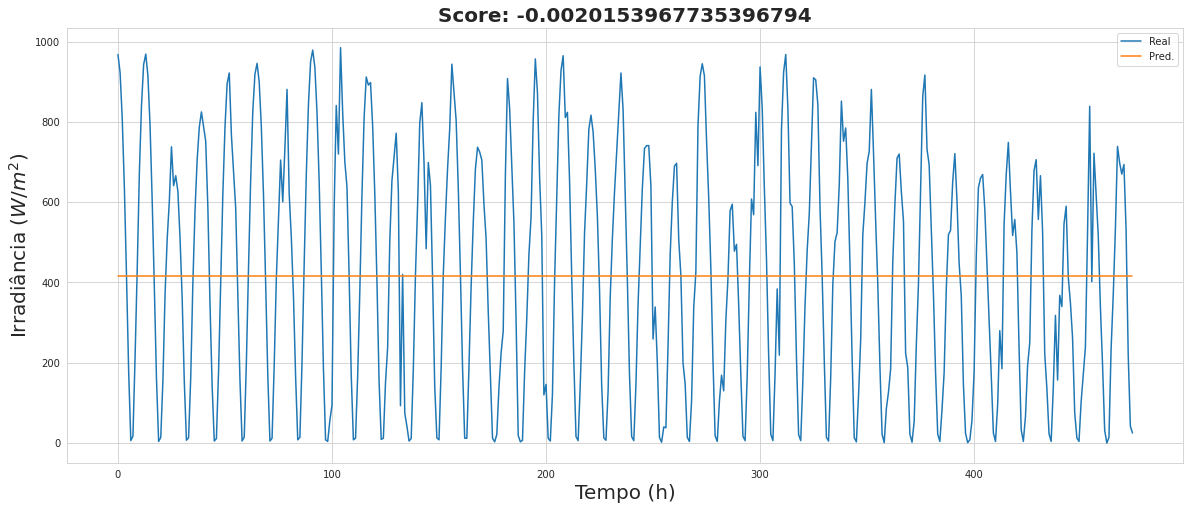

In [4]:
dummy_1 = pd.DataFrame({'y_real':y_test, 'y_pred':y_train.mean()})
accuracy_1 = sklearn.metrics.r2_score(dummy_1.y_real, dummy_1.y_pred)

with sns.axes_style('whitegrid'):
    plt.figure(figsize=(20,8))
    plt.plot(y_test, label='Real')
    plt.plot(dummy_1.y_pred, label='Pred.')
    plt.xlabel('Tempo (h)', fontsize=20)
    plt.ylabel('Irradiância ($W/m^2$)', fontsize=20)
    plt.title(f'Score: {accuracy_1}', fontsize=20, weight='bold')
    plt.legend()

## Coeficiente de determinação ($R^2$ )
# <center>$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$</center>

Onde $y_i$ corresponde ao valor esperado, $\hat{y}_i$ o valor predito para o i-ésimo exemplo e $\bar{y}$ a média do alvo das predições. Nesta métrica, o melhor valor que pode ser encontrado é 1 (um).

### Médias dos atributos previsores

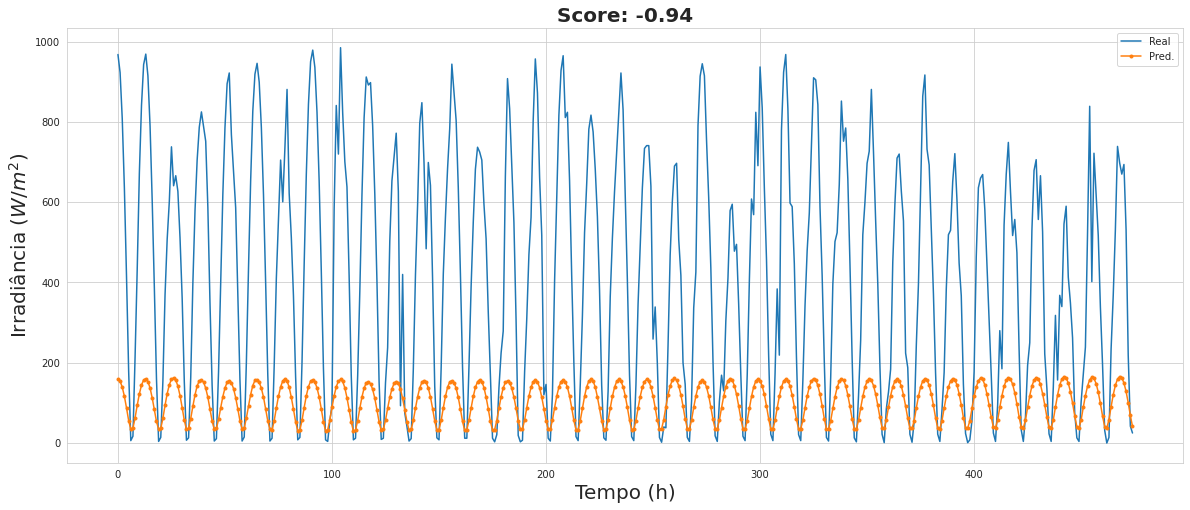

In [5]:
dummy_2 = pd.DataFrame({'y_real':y_test, 'y_pred':X_test.mean(axis=1)})
accuracy_2 = sklearn.metrics.r2_score(dummy_2.y_real, dummy_2.y_pred)

with sns.axes_style('whitegrid'):
    plt.figure(figsize=(20,8))
    dummy_2['y_real'].plot(label='Real')
    dummy_2['y_pred'].plot(marker='.', label='Pred.')
    plt.xlabel('Tempo (h)', fontsize=20)
    plt.ylabel('Irradiância ($W/m^2$)', fontsize=20)
    plt.title(f'Score: {round(accuracy_2,2)}', fontsize=20, weight='bold')
    plt.legend()

### Lags (atrasos de tempo)

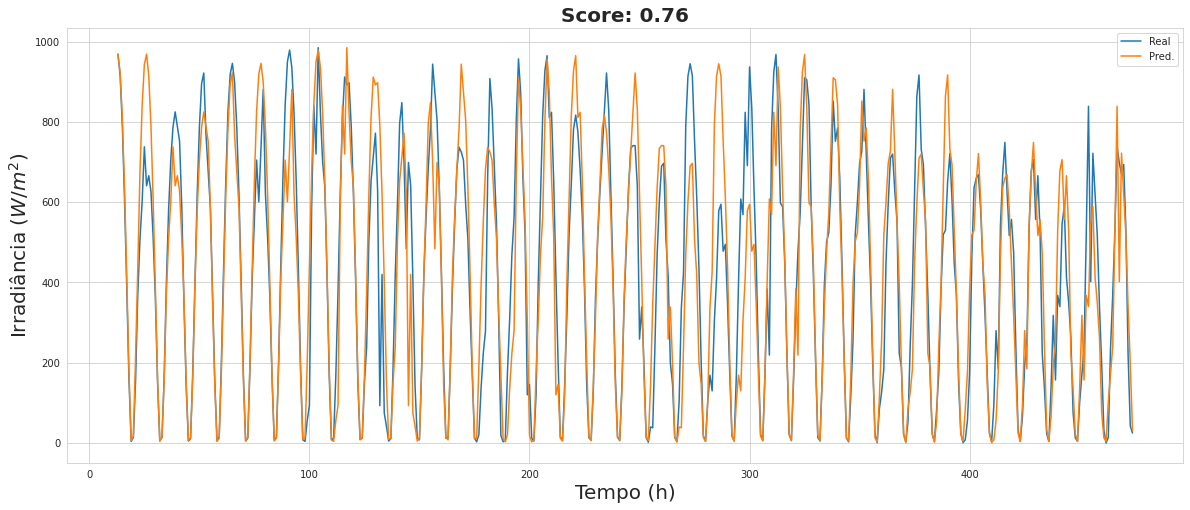

In [6]:
dummy_3 = pd.DataFrame({'y_real':y_test, 'y_pred':y_test.shift(13)}).dropna()
accuracy_3 = sklearn.metrics.r2_score(dummy_3.y_real, dummy_3.y_pred)
#accuracy_3 = sklearn.metrics.mean_absolute_percentage_error(dummy_3.y_real, dummy_3.y_pred)
#accuracy_3 = sklearn.metrics.mean_absolute_error(dummy_3.y_real, dummy_3.y_pred)

with sns.axes_style('whitegrid'):
    dummy_3['y_real'].plot(figsize=(20,8), label='Real')
    dummy_3['y_pred'].plot(label='Pred.')
    plt.xlabel('Tempo (h)', fontsize=20)
    plt.ylabel('Irradiância ($W/m^2$)', fontsize=20)
    plt.title(f'Score: {round(accuracy_3,2)}', fontsize=20, weight='bold')
    plt.legend()

### todo
+ estudar e plotar gráfico de autocorreação para melhor entendimento do baseline anterior

### Médias Móveis

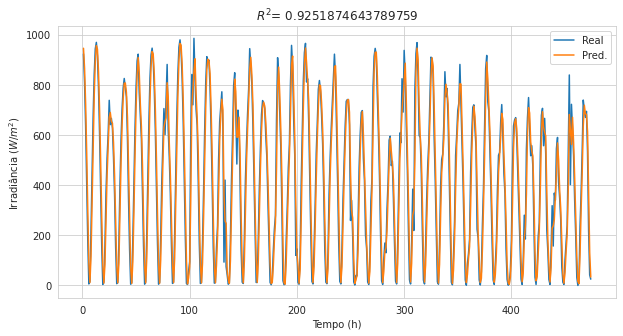

In [7]:
dummy_4 = pd.DataFrame({'y_real':y_test, 'y_pred':y_test.rolling(2).mean()}).dropna()
accuracy_r2 = sklearn.metrics.r2_score(dummy_4.y_real, dummy_4.y_pred)
#accuracy_mape = sklearn.metrics.mean_absolute_percentage_error(dummy_3.y_real, dummy_3.y_pred)
#accuracy_mse = sklearn.metrics.mean_squared_error(dummy_3.y_real, dummy_3.y_pred)

with sns.axes_style('whitegrid'):
    dummy_4['y_real'].plot(figsize=(10,5), label='Real')
    dummy_4['y_pred'].plot(label='Pred.')
    plt.xlabel('Tempo (h)')
    plt.ylabel('Irradiância ($W/m^2$)')
    plt.title(f'$R^2$= {accuracy_r2}')
    plt.legend()
    #plt.savefig('../../Imagens/grafico_predicoes_melhor_dummy.png', dpi=300)